# Exercise 01.1

In order to test the Pseudo-Random Number generator two quantities are computed: $\langle r \rangle = \int_0^1 r dr = 1/2$ and $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$, where r is a random variable extracted from a uniform distribution on the interval [0,1).  


The following parameters have been chosen: total number of throws $N=100000$, number of throws per block $M=1000$. Given the parameters, 100 estimates ($N/M$) for each quantities are computed.

The progressive average and its uncertainty are shown as a function of the number of throws. Within the uncertaintes, the computed values agree with the expected ones (Figures 1 & 3). Moreover, by plotting only the uncertainty as a function of the number of blocks, the expected power law scaling ($n=-1/2$) can be observed (Figures 2 & 4).

Even if a more complete and precise analysis will be carried out in a future exercise, it is worth making a preliminary comment about the blocking method and its parameters $(M,N)$. First, since the method is basically just a data processing that aims at applying the Central Limit Theorem (CLT), the parameters should be chosen so that the primary ipothesis of the theorem, namely the statistical independency, is satisfied. In fact, when the single random throws $f(r_{i})$ are not statistically independent, the average values $\frac{1}{M}\sum_{i=0}^{M}{f(r_{i})}$ are statistically independent, provided that M is large enough.

However, it has to be noted that in the present case the random generator is not source of significant correlation, therefore the blocking method is not strictly necessary.

Once defined the block size, it is obvious that more the blocks and better the results will be, because of the uncertainty scaling.

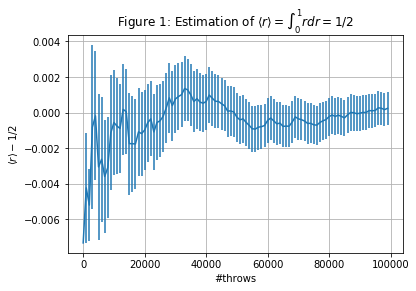

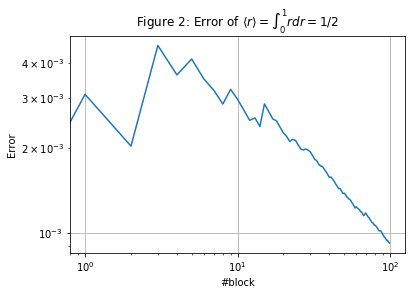

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


prog_av, error = np.loadtxt('ex_01.1/ex_01.1.1.dat', usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(prog_av.size)
block_size=1000

plt.errorbar(x*block_size,prog_av-0.5,yerr=error)
plt.title(r'Figure 1: Estimation of $\langle r \rangle = \int_0^1 r dr = 1/2$')
plt.xlabel('#throws')
plt.ylabel(r'$\langle r \rangle-1/2$')
plt.grid(True)
plt.show()


plt.plot(x,error)
plt.yscale('log')
plt.xscale('log')
plt.title(r'Figure 2: Error of $\langle r \rangle = \int_0^1 r dr = 1/2$')
plt.xlabel('#block')
plt.ylabel(r'Error')
plt.grid(True)
plt.show()

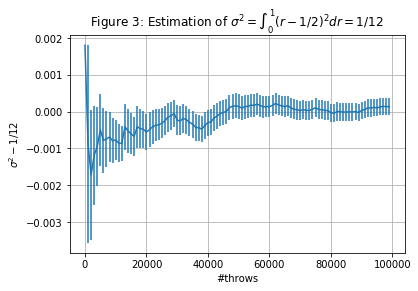

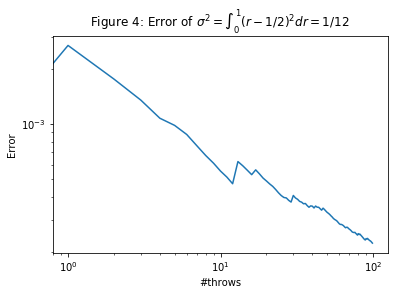

In [3]:
prog_av, error = np.loadtxt('ex_01.1/ex_01.1.2.dat', usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(prog_av.size)
block_size=1000

plt.errorbar(x*block_size,prog_av-1./12.,yerr=error)
plt.title('Figure 3: Estimation of $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$')
plt.xlabel('#throws')
plt.ylabel('$\sigma^2 - 1/12$')
plt.grid(True)
plt.show()

plt.show()


plt.plot(x,error)
plt.title('Figure 4: Error of $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$')
plt.xlabel('#throws')
plt.ylabel('Error')
plt.yscale('log')
plt.xscale('log')

## $\chi^2$ test
In order to verify that our pseudo-random generator works properly we have to check the quality of the generated distribution. Since there is no way to directly prove that a set of number is drawn from a specific random distribution, we have to apply an indirect method that provides the probability that the set is not drawn from the given distribution. In this case, the $\chi^2$ test proves to be suitable for the task. 

In the present case, we want to check that our random (0,1) uniform generator really generates values according to a uniform distribution. Hence, the $\chi^2$ test is applied as follows:
- $N=10000$ numbers are randomly generated in the interval [0,1) and binned into $M=100$ sub-intervals (of equal width);
- being $E_i$ and $O_i$ the expected and observed contents of the i-bin, respectively, $\chi^2$ is computed as:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
where $O_i=N/M$;
- the previous two steps are repeated 100 times so to have 100 values of $\chi^2$.

Since we are dealing with a counting experiment where the uncertainty is estimated as the square root of the counted number, we expect that  $E_i=N/M \pm \sqrt(N/M)$ and consequently that $\chi^2$ values will fluctuate around a mean value of 100.
Figures 5&6 meet our expectations, hence confirming that our uniform generator works fine or, more accurately, that the probability it does not work properly are very low. 

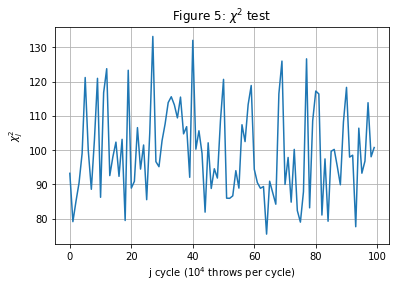

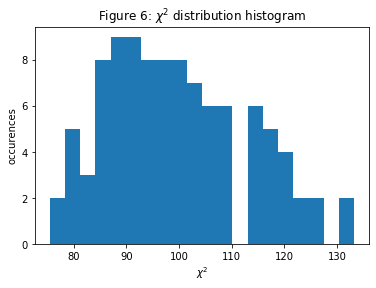

average chi^2 =99.5756


In [6]:
chi = np.loadtxt('ex_01.1/ex_01.1.3.dat', usecols=(0), unpack='true')
x = np.arange(chi.size)

plt.plot(x, chi)
plt.title('Figure 5: $\chi^2$ test')
plt.xlabel('j cycle ($10^4$ throws per cycle)')
plt.ylabel('$\chi_{j}^2$')
plt.grid(True)
plt.show()


plt.hist(chi, bins=20)
plt.title('Figure 6: $\chi^2$ distribution histogram')
plt.xlabel('$\chi^2$')
plt.ylabel('occurences')
plt.show()

print(rf"average chi^2 ={np.mean(chi)}")

# Exercise 01.2

The exercise provides a graphical proof of the Central Limit Theorem. The average value of N independent and identically distributed random variables is plotted in histograms. Three different distribution are considered (Dice, Exponential, and Cauchy) and for each one of them N takes values 1,2,10,100. 

The distributions used are:

-Dice:   integers uniformly drawn from the range [1,6], $\mu_{dice}=3.5$, $\sigma_{dice}=1.7078$; 

-Exponential:    $p(x) = \lambda \exp(-\lambda x)$,     $\lambda=1$,     $\mu_{exp}=1$, $\sigma_{exp}=1$;

-Cauchy:    $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$,  $\mu_{cauchy}=0$,  $\Gamma_{cauchy}=1$    ;


The Dice and Exponential distributions prove the Central Limit Theorem, which assumes that the first two moments exist. On the other side, the Cauchy distribution has infinite variance and an extension of the theorem is needed. The extension introduces a new class of limiting distributions, and the Cauchy is among them.



Expected limiting distributions according to the Central Limit Theorem:

-Dice:   Gaussian with $\mu = \mu_{dice} = 3.5$, $\sigma = \sigma_{dice}/\sqrt{N} = 0.1708$;

-Exponential:   Gaussian with $\mu = \mu_{exp} = 1$, $\sigma = \sigma_{dice}/\sqrt{N} = 0.1$;

-Cauchy:    Cauchy with with $\mu = \mu_{cauchy} = 0$, $\Gamma = \Gamma_{cauchy}= 1$;


For the Cauchy distribution it can be proved that *If $X_{1},…,X_{N}$ are i.i.d. Cauchy(0,1), the average distribution is also Cauchy(0,1)* and this holds for every N, as it can be seen in the Cauchy histograms.


**Proof:**  *using the charachteristic function*:
$$
\begin{align}
\varphi_{\bar{X}}(t) &= \text{E} \left (e^{it \bar{X}} \right ) \\
&= \text{E} \left ( \prod_{j=1}^{n} e^{it X_j / n} \right ) \\
&= \prod_{j=1}^{n} \text{E} \left ( e^{it X_j / n} \right ) \\
&= \text{E} \left (e^{it X_1 / n} \right )^n \\
&= e^{- |t|}
\end{align}
$$,

*where $e^{- |t|}$ is the charachteristic function of a Cauchy(0.1) distribution.*

In [3]:
import scipy.stats as ss


def plot_print(distr):
    
    data = np.loadtxt(distr["file"], usecols=(0,1,2,3), unpack='true')
    
    # generate a figure with a single subplot, of some size
    fig, ax = plt.subplots(1, 4, figsize=(18, 5))
    n_sum = np.array([1,2,10,100])
    
    
    # plot empirical estimation
    for i in range(4):
        ax[i].hist(data[i],range=distr["bin_range"], bins=50, density='True')
        ax[i].set_title(rf'$N={n_sum[i]}$')
        ax[i].set_xlabel(r'$S_{N}=\frac{1}{N} \sum_{i=1}^{N}x_{i}$')
        ax[i].set_ylabel("Occurences")
    
    P = distr["fit_func"].fit(data[3])
    print(rf"Limiting distribution fitted parameters: {P}")

    rX = np.linspace(distr["fit_range"][0], distr["fit_range"][1], 100)
    rP = distr["fit_func"].pdf(rX, *P)
    
    ax[3].plot(rX, rP)
    
    fig.suptitle(distr["title"])

Limiting distribution fitted parameters: (3.4999029999999998, 0.17113643852493834)
Limiting distribution fitted parameters: (1.0005304437, 0.09862300935707058)
Limiting distribution fitted parameters: (0.002016215928899528, 0.9916838382842189)


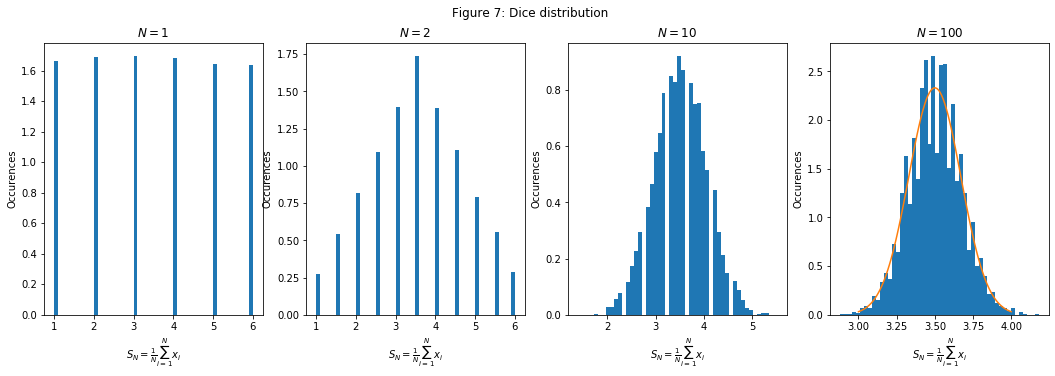

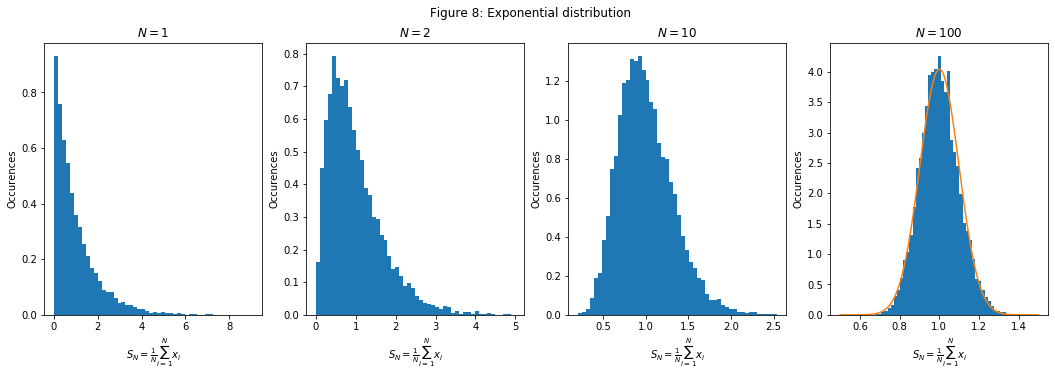

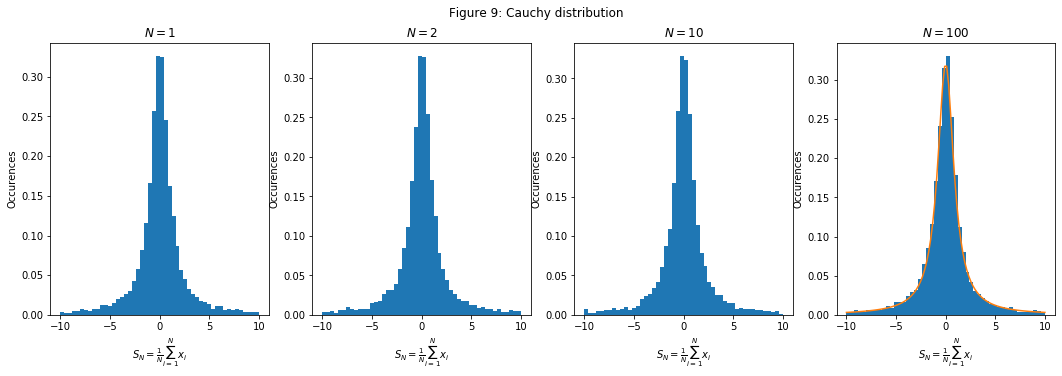

In [4]:
dice = {
  "file" : 'ex_01.2/ex_01.2_dice.dat',
  "title" : 'Figure 7: Dice distribution',
  "bin_range" : None,
  "fit_range" : [3,4],
  "fit_func" : ss.norm,
}

exp = {
  "file" : 'ex_01.2/ex_01.2_exp.dat',
  "title" : 'Figure 8: Exponential distribution',
  "bin_range" : None,
  "fit_range" : [0.5,1.5],
  "fit_func" : ss.norm,
}

cauchy = {
  "file" : 'ex_01.2/ex_01.2_cauchy.dat',
  "title" : 'Figure 9: Cauchy distribution',
  "bin_range" : [-10,10],
  "fit_range" : [-10,10],
  "fit_func" : ss.cauchy,
}

plot_print(dice)
plot_print(exp)
plot_print(cauchy)

    
    


# Exercise 01.3

An estimate of $\pi$ is computed by exploiting the solution to the Buffon's needle problem. Suppose to have a plane divided into parallel strips, each of the same width $d$, and to drop a needle of lenght $l$ ($l<d$) onto the plane. 
It can be easily shown that the probability that the needle will lie across a line between two strips is $p=\frac{2l}{\pi d}$. Therefore, once properly generated and thrown a sufficient number of needles, $p$ can be estimated as $\frac{N_{intersecting}}{N_{total}}$.  A comment about the needle orientation and the related request to avoid using $\pi$ (that should not be used before it is determined) can be found at the beginning of the main.cxx file.

The plots show agreement between results and expectations.

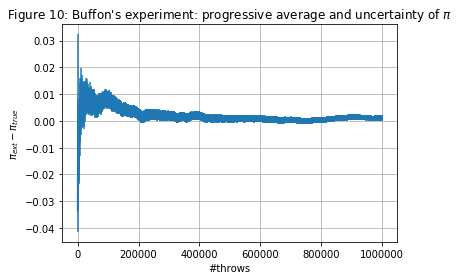

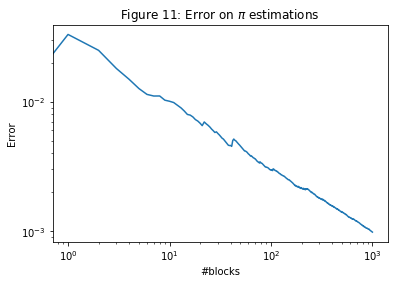

In [6]:
prog_av, error = np.loadtxt('ex_01.3/Buffon.dat', usecols=(0,1), delimiter=' ', unpack='true')
x=np.arange(prog_av.size)
block_size=1000;


plt.errorbar(x*block_size,prog_av-np.pi,yerr=error)
plt.title('Figure 10: Buffon\'s experiment: progressive average and uncertainty of $\pi$')
plt.xlabel('#throws')
plt.ylabel('$\pi_{ext} - \pi_{true}$')
plt.grid(True)
plt.show()

plt.show()

plt.plot(x,error)
plt.title('Figure 11: Error on $\pi$ estimations')
plt.xlabel('#blocks')
plt.ylabel('Error')
plt.yscale('log')
plt.xscale('log')